In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lets load my json file into our dataframe. It will be easy since I regulate the data :)
df = pd.read_json("extracted_data.json")
print(df)

                                                title  \
0                    Blinksport Su Ve Kir Itici Sprey   
1                         ROBEVE 3 Bluetooth Kulaklik   
2   D'VERS Siyah Unisex 13-14-15.6 Inc Uyumlu Macb...   
3   Prozinc Kepek Şampuani Yağli Saçlar Için 3x300...   
4    TRENDYOLMILLA Beyaz Düğme Detayli Şort & Bermuda   
5                      GRIMELANGE Carrol Relaxed Şort   
6                            Addax Beli Lastikli Şort   
7   Prozinc Salicade Egzama Ve Kepek Karşiti Şampu...   
8   Prozinc Kepek Şampuani Yağli Saçlar Için 3x300...   
9   Acana Classics - Red Meat Köpek Mamasi 2 Kg - ...   
10  Prozinc Salicade Egzama Ve Kepek Karşiti Şampu...   
11  Prozinc Kepek Şampuani Yağli Saçlar Için 3x300...   
12  TRENDYOLMİLLA Antrasit Çift Cepli Oversize/Gen...   
13  TRENDYOLMİLLA Siyah Bisiklet Yaka Triko Alt-Üs...   
14   Nascita Profesyonel Oval Yapili Kapatici Firçasi   
15             TRENDYOLMILLA Bej Dik Yaka Triko Kazak   
16  TRENDYOLMILLA Indigo Yumuşa

DATAFRAME DISCOVERY PART

In [3]:
#Lets look at the first 5 rows
print(df.head())

                                               title              category  \
0                   Blinksport Su Ve Kir Itici Sprey  Ev Bakim ve Temizlik   
1                        ROBEVE 3 Bluetooth Kulaklik              Kulaklik   
2  D'VERS Siyah Unisex 13-14-15.6 Inc Uyumlu Macb...     Bilgisayar&Tablet   
3  Prozinc Kepek Şampuani Yağli Saçlar Için 3x300...              Kozmetik   
4   TRENDYOLMILLA Beyaz Düğme Detayli Şort & Bermuda                 Giyim   

          sender      price  rating     purchase_date  
0  ARTI 2 MAGAZA  299,90 TL     4.7  November 2, 2023  
1         MARIMA  349,90 TL     3.8  November 2, 2023  
2         D'VERS  219,90 TL     4.7  November 2, 2023  
3     DERMOAKTIF  399,90 TL     4.6   August 24, 2023  
4       Trendyol  191,99 TL     4.1     July 23, 2023  


In [4]:
#I have made a lot of purchases. Lets look some statistics about ratings of products.
print(df.describe())

          rating
count  30.000000
mean    4.530000
std     0.240903
min     3.800000
25%     4.400000
50%     4.600000
75%     4.700000
max     5.000000


In [5]:
#I also want to know the highest rated products.
high_rating_purchases = df[df['rating'] > 4.7]
print(high_rating_purchases)

                                                title    category  \
9   Acana Classics - Red Meat Köpek Mamasi 2 Kg - ...    Pet Shop   
26                    Pedigree Dentastix Large 270 gr    Pet Shop   
27  Acana Classics - Red Meat Köpek Mamasi 14,5 Kg...    Pet Shop   
32  MORCA Kapitone Laptop Kilifi 15.6 & 16 İnç Bej...  Elektronik   

          sender      price  rating     purchase_date  
9       Frog Pet  682,25 TL     4.8  January 20, 2023  
26     Baran Pet      89 TL     4.9   January 3, 2022  
27  Pine Limited   4.000 TL     5.0   January 3, 2022  
32    morcacanta  549,90 TL     4.8  November 1, 2021  


In [6]:
#can we know some information about df?

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          33 non-null     object 
 1   category       31 non-null     object 
 2   sender         30 non-null     object 
 3   price          30 non-null     object 
 4   rating         30 non-null     float64
 5   purchase_date  33 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.7+ KB
None


In [7]:
#As we observed, there are some null values. Since these are very low, lets drop them.
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 32
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          30 non-null     object 
 1   category       30 non-null     object 
 2   sender         30 non-null     object 
 3   price          30 non-null     object 
 4   rating         30 non-null     float64
 5   purchase_date  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.6+ KB
None


In [8]:
#I want to know where I get the most products.
sender_counts = df['sender'].value_counts()
print(sender_counts)
most_products_sender = sender_counts.idxmax()
most_products_count = sender_counts.max()

print(f"\n\n\nThe sender with the most products is: {most_products_sender} (Count: {most_products_count})")



sender
Trendyol             11
DERMOAKTIF            5
ARTI 2 MAGAZA         1
MARIMA                1
D'VERS                1
GRIMELANGE            1
Frog Pet              1
CARSHIPAZAR           1
Torima                1
Migrodepo             1
Baran Pet             1
Pine Limited          1
CROSS JEANS           1
Pozitif Kirtasiye     1
ALIKAA                1
morcacanta            1
Name: count, dtype: int64



The sender with the most products is: Trendyol (Count: 11)


In [9]:
'''
    I want to know the most expensive and cheapest products I get.
    There is a problem I need to convert 289,99 TL to -> 289.99 as numeric
'''
df['price'] = pd.to_numeric(df['price'].str.replace('[^\d,]', '', regex=True).str.replace(',', '.', regex=False), errors='coerce')

In [10]:
most_expensive_index = df['price'].idxmax()
cheapest_index = df['price'].idxmin()
most_expensive_product = df.loc[most_expensive_index]
cheapest_product = df.loc[cheapest_index]
print(f"The most expensive product is:\n{most_expensive_product}")
print(f"\n\n\nThe cheapest product is:\n{cheapest_product}")

The most expensive product is:
title            Acana Classics - Red Meat Köpek Mamasi 14,5 Kg...
category                                                  Pet Shop
sender                                                Pine Limited
price                                                       4000.0
rating                                                         5.0
purchase_date                                      January 3, 2022
Name: 27, dtype: object



The cheapest product is:
title            Nascita Profesyonel Oval Yapili Kapatici Firçasi
category                                                   Makyaj
sender                                                CARSHIPAZAR
price                                                        41.0
rating                                                        4.7
purchase_date                                  September 28, 2022
Name: 14, dtype: object


In [11]:
#I want to know what is the average money I spent on purchases
average_price = df['price'].mean()

print(f"The average price of your purchases is: {average_price:.2f} TL")

The average price of your purchases is: 481.10 TL


DATA VIZULATION

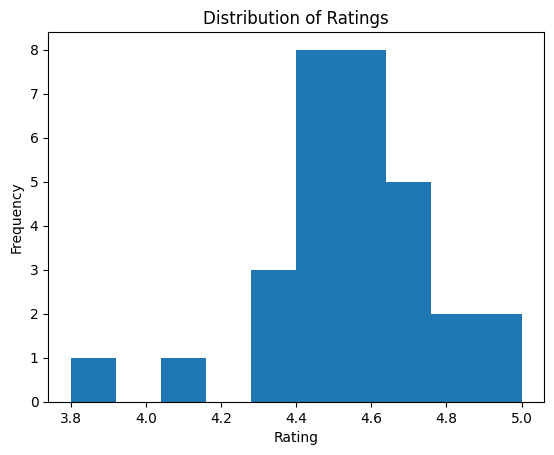

In [12]:
df['rating'].plot(kind='hist', bins=10, title='Distribution of Ratings')
plt.xlabel('Rating')
plt.show()


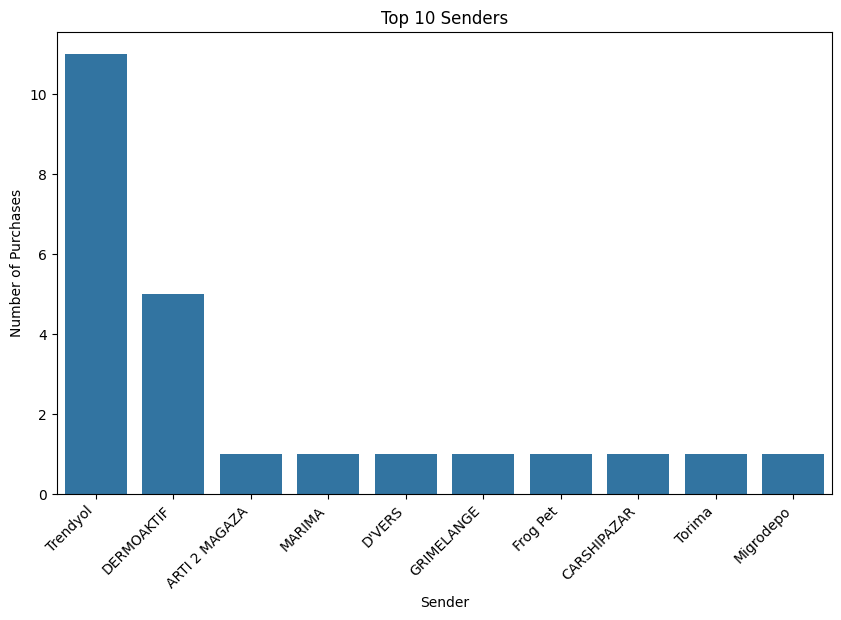

In [13]:
import seaborn as sns

sender_counts = df['sender'].value_counts()

top_senders = sender_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_senders.index, y=top_senders.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Senders')
plt.xlabel('Sender')
plt.ylabel('Number of Purchases')
plt.show()


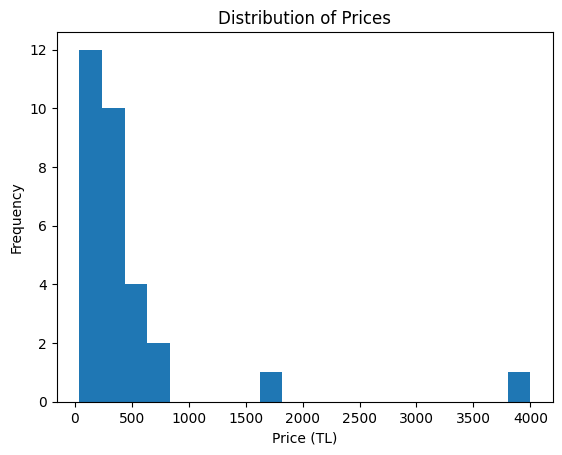

In [14]:
df['price'].plot(kind='hist', bins=20, title='Distribution of Prices')
plt.xlabel('Price (TL)')
plt.show()


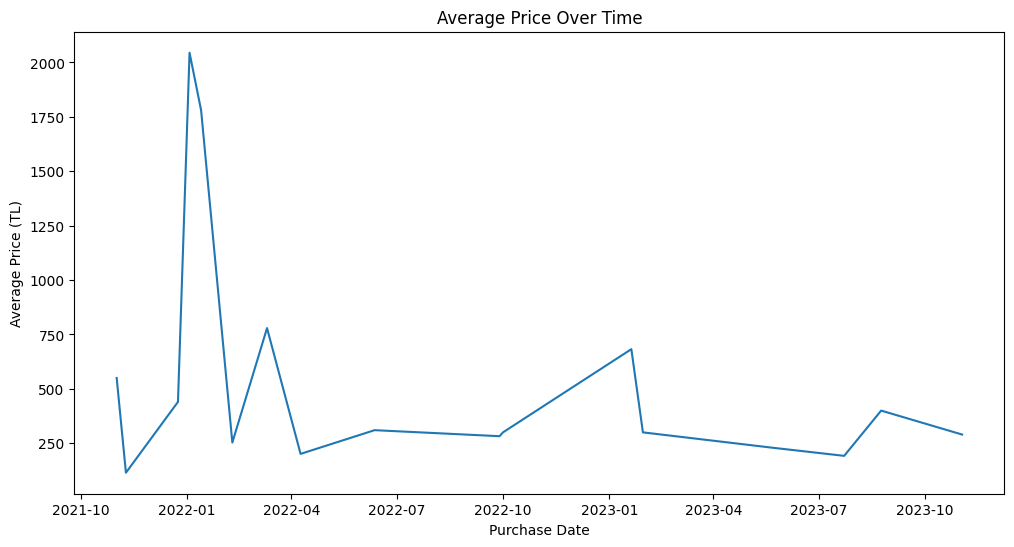

In [15]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(x=df['purchase_date'], y=df['price'].astype(float), estimator='mean', err_style=None)
plt.title('Average Price Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Average Price (TL)')
plt.show()

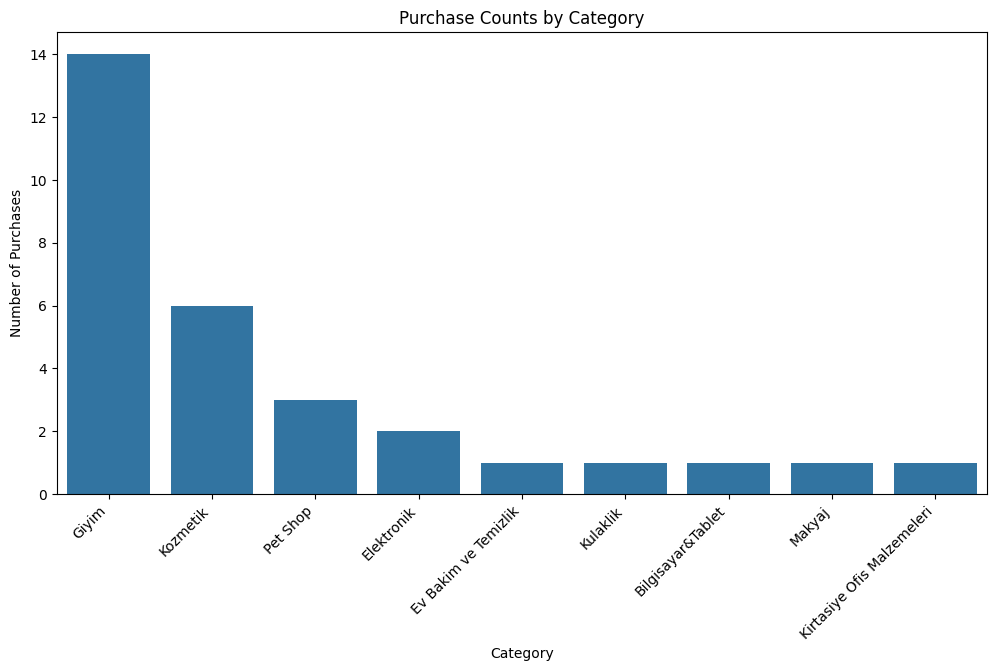

The category you purchased the most is: Giyim


In [16]:
category_counts = df['category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Purchase Counts by Category')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.show()

most_purchased_category = category_counts.idxmax()

print(f"The category you purchased the most is: {most_purchased_category}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


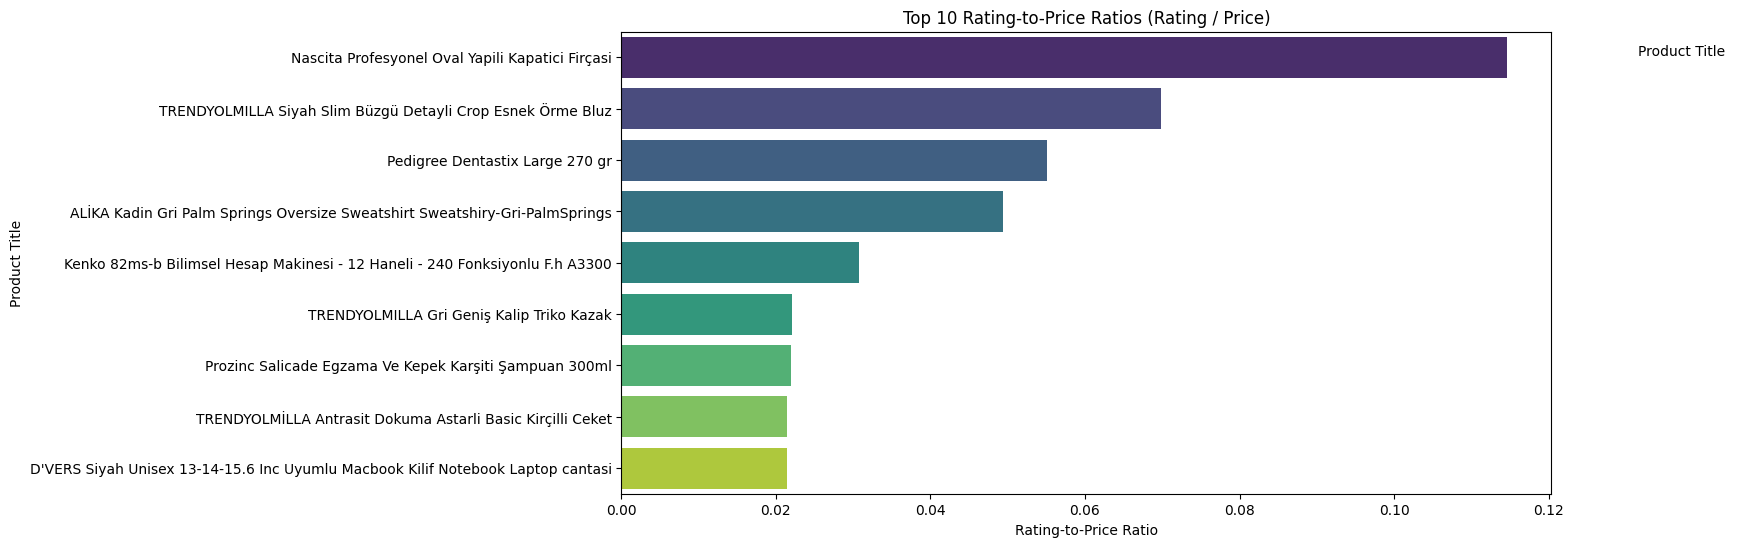

In [21]:
df['rating_price_ratio'] = df['rating'] / df['price']

df_sorted = df.sort_values(by='rating_price_ratio', ascending=False)

top_10_products = df_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products['rating_price_ratio'], y=top_10_products['title'], hue=top_10_products['title'], palette='viridis', dodge=False)
plt.title('Top 10 Rating-to-Price Ratios (Rating / Price)')
plt.xlabel('Rating-to-Price Ratio')
plt.ylabel('Product Title')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Product Title', frameon=False)
plt.show()



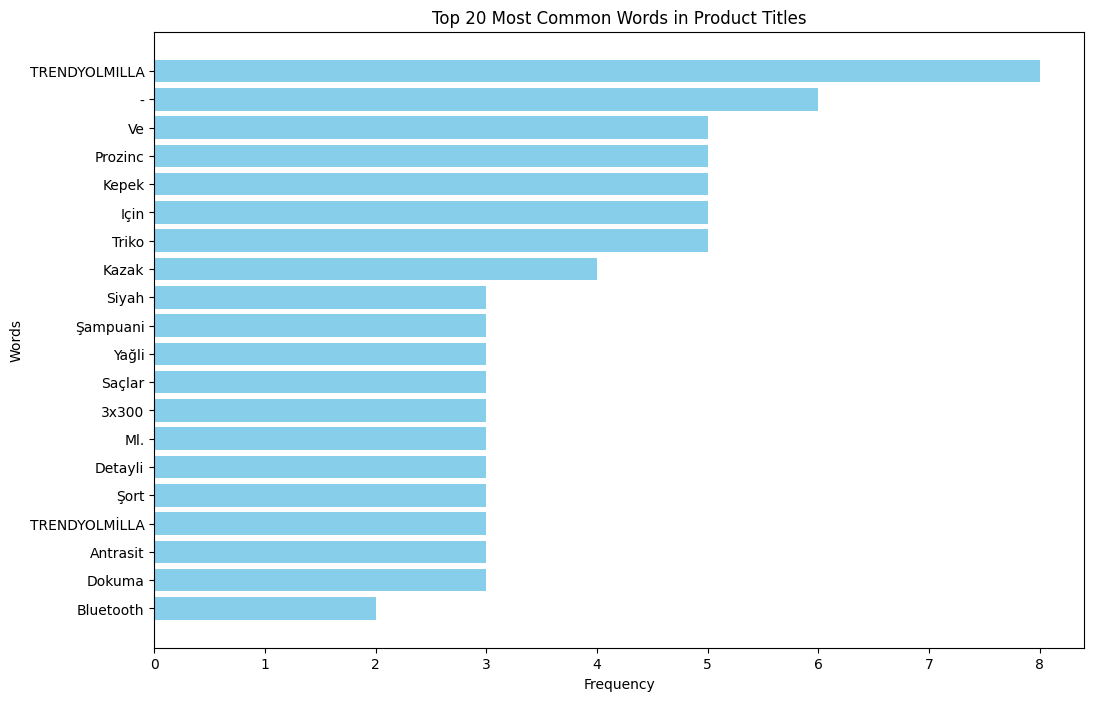

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = ' '.join(df['title']).split()

word_counts = Counter(all_words)

top_words = word_counts.most_common(20)

words, frequencies = zip(*top_words)

plt.figure(figsize=(12, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Product Titles')
plt.gca().invert_yaxis()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df[['price']].fillna(0) 
y = df['rating'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.12359193607044583


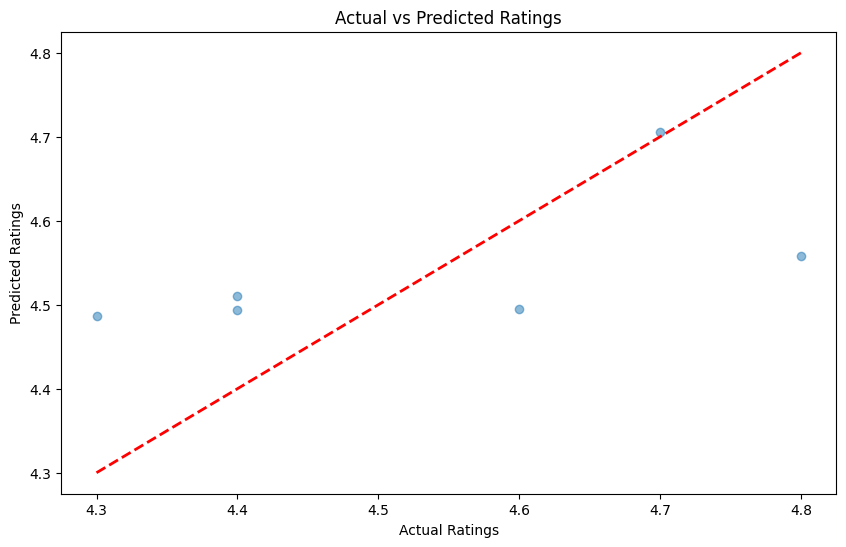

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2) 
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()
